In [55]:
import pandas as pd
df = pd.read_csv('data/score.csv', index_col='지원번호')

import matplotlib.pyplot as plt

#[한글 설정]
plt.rc('font', family = 'Malgun Gothic')  #글꼴
plt.rc('font', size = 10)  #크기

plt.rc('axes', unicode_minus = False)  #마이너스

In [56]:
df.loc['3번', '학교'] = '산북고'
df.loc['7번', '학교'] = '남능고'
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,산북고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,Java
5번,강백호,북산고,188,15,20,10,35,10,Java
6번,변덕규,능남고,202,80,100,95,85,80,C#
7번,황태산,남능고,188,55,65,45,40,35,Python
8번,윤대협,능남고,190,100,85,90,95,95,C#
9번,홍길동,산북고,180,90,85,90,75,100,C#


In [57]:
#학교별 키의 평균
group = df.groupby('학교')['키'].mean()
group

학교
남능고    191.0
능남고    196.0
북산고    189.0
산북고    177.0
Name: 키, dtype: float64

In [58]:
school = group.index
height = group.values

school, height

(Index(['남능고', '능남고', '북산고', '산북고'], dtype='object', name='학교'),
 array([191., 196., 189., 177.]))

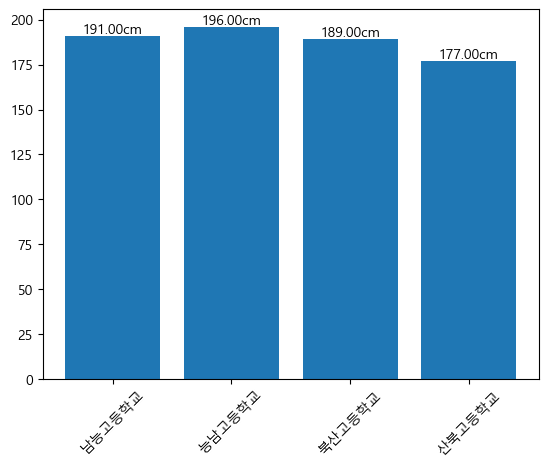

In [59]:
#막대그래프
plt.bar(school, height)

for idx, h in enumerate(height):
    plt.text(idx, h+1.5, f'{h:.2f}cm', ha='center')

plt.xticks(school, [s+'등학교' for s in school], rotation = 45)

plt.show()

In [60]:
#학교별 학생 수
group = df.groupby('학교').size()

school = group.index
people = group.values

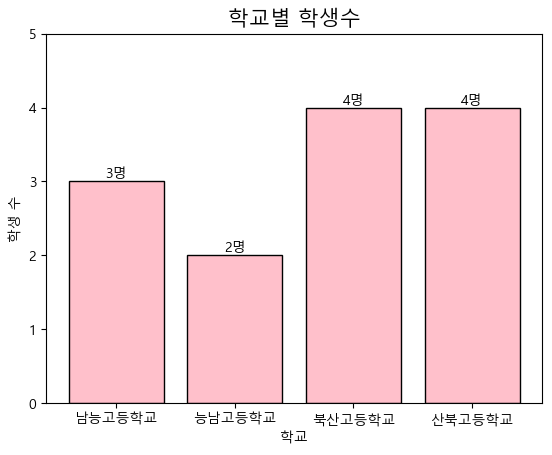

In [61]:
plt.bar(school, people, color = 'pink',ec='black')

plt.title('학교별 학생수', size = 15)
plt.xlabel('학교')
plt.ylabel('학생 수')

plt.xticks(school, [s+'등학교' for s in school])

for idx, p in enumerate(people):
    plt.text(idx, p+0.05, f'{p}명', ha='center')

plt.ylim(0, 5)

plt.show()

In [62]:
#sw별 인원수
df['SW특기'] = df['SW특기'].str.capitalize()
df.fillna({'SW특기':'없음'}, inplace=True)

group = df.groupby('SW특기').size()

sw = group.index
count = group.values

sw, count

(Index(['C#', 'Java', 'Javascript', 'Python'], dtype='object', name='SW특기'),
 array([3, 5, 1, 4]))

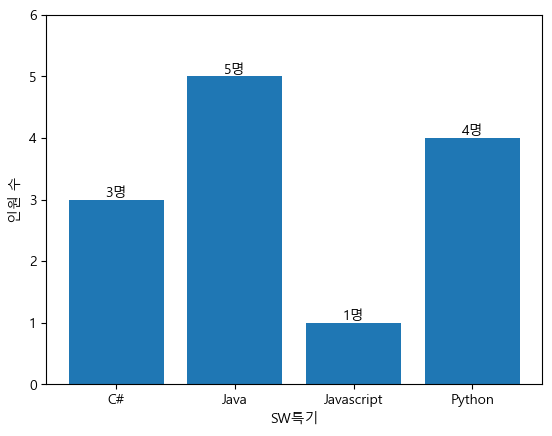

In [63]:
plt.bar(sw, count)

for idx, c in enumerate(count):
    plt.text(idx, c+0.05, f'{c}명', ha='center')

plt.yticks([i for i in range(0, max(count)+2, 1)])
plt.ylim(0, max(count)+1)

plt.xlabel('SW특기')
plt.ylabel('인원 수')

plt.show()

In [64]:
df['평균'] = df.apply(lambda row: row['국어':'사회'].mean(), axis=1)
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,평균
지원번호,,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python,91.0
2번,정대만,북산고,184,40,35,50,55,25,Java,41.0
3번,송태섭,산북고,168,80,75,70,80,75,Javascript,76.0
4번,서태웅,북산고,187,40,60,70,75,80,Java,65.0
5번,강백호,북산고,188,15,20,10,35,10,Java,18.0
6번,변덕규,능남고,202,80,100,95,85,80,C#,88.0
7번,황태산,남능고,188,55,65,45,40,35,Python,48.0
8번,윤대협,능남고,190,100,85,90,95,95,C#,93.0
9번,홍길동,산북고,180,90,85,90,75,100,C#,88.0


In [65]:
#학교별 평균점수 막대그래프로 출력
group = df.groupby('학교')['평균'].mean()
group

학교
남능고    66.333333
능남고    90.500000
북산고    53.750000
산북고    83.000000
Name: 평균, dtype: float64

In [66]:
school = group.index
avg = group.values

school, avg

(Index(['남능고', '능남고', '북산고', '산북고'], dtype='object', name='학교'),
 array([66.33333333, 90.5       , 53.75      , 83.        ]))

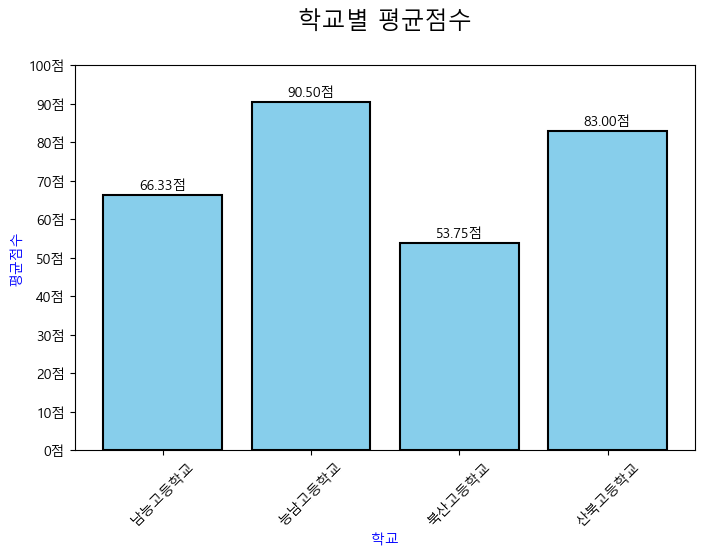

In [67]:
plt.figure(figsize=(8, 5))
plt.bar(school, avg, color = 'skyblue', ec = 'black', lw=1.5)
#plt.title('학교별 평균점수', size=15)

for idx, a in enumerate(avg):
    plt.text(idx, a+1.5, f'{a:.2f}점', ha='center')

plt.ylim(0, 100)
plt.xticks(school, [s+'등학교' for s in school], rotation = 45)
yticks = [y for y in range(0, 101, 10)]
plt.yticks(yticks, [f'{y}점' for y in yticks])

plt.title('학교별 평균점수\n', size = 17)
plt.xlabel('학교', color = 'blue')
plt.ylabel('평균점수', color = 'blue')

plt.show()

In [68]:
import pandas as pd
df = pd.read_csv('c:/python/04.데이터시각화/data/score.csv', index_col='지원번호')

import matplotlib.pyplot as plt

#[한글 설정]
plt.rc('font', family = 'Malgun Gothic')  #글꼴
plt.rc('font', size = 10)  #크기

plt.rc('axes', unicode_minus = False)  #마이너스

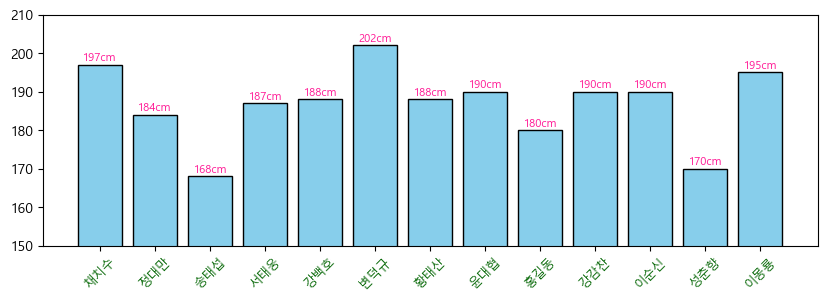

In [69]:
name = df['이름']
height = df['키']
plt.figure(figsize=(10, 3))
plt.bar(name, height, color='skyblue', ec='black')
plt.ylim(150, 210)

for idx, h in enumerate(height):
    plt.text(idx, h+1, f'{h}cm', ha='center', color='deeppink', size=8)

plt.xticks(name, rotation = 45, size=9, color='darkgreen')

plt.show()

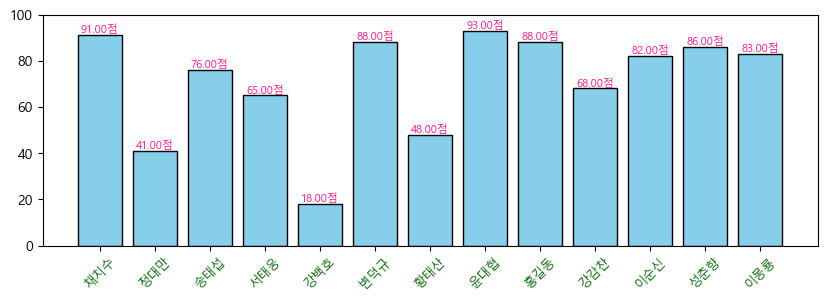

In [70]:
df['평균'] = df.apply(lambda row: row['국어':'사회'].mean(), axis=1)
name = df['이름']
avg = df['평균']

plt.figure(figsize=(10, 3))
plt.bar(name, avg, color='skyblue', ec='black')
plt.ylim(0, 100)
plt.xticks(name, rotation = 45, size=9, color='darkgreen')

for idx, a in enumerate(avg):
    plt.text(idx, a+1, f'{a:.2f}점', ha='center', color='deeppink', size=8)

plt.show()

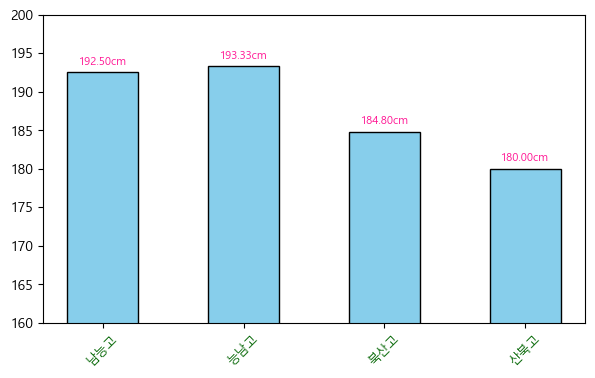

In [71]:
#3.학교별 평균키
group = df.groupby('학교')['키'].mean()
labels = group.index
values = group.values

plt.figure(figsize=(7, 4))
plt.bar(labels, values, color='skyblue', ec='black', width=0.5)
plt.ylim(160, 200)
plt.xticks(labels, rotation = 45, size=9, color='darkgreen')

for idx, val in enumerate(values):
    plt.text(idx, val+1, f'{val:.2f}cm', ha='center', color='deeppink', size=8)

plt.show()

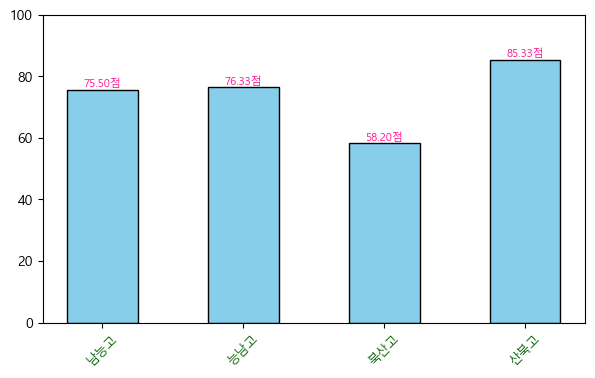

In [72]:
#4.학교별 평균점수
df['평균'] = df.apply(lambda row: row['국어':'사회'].mean(), axis=1)
group = df.groupby('학교')['평균'].mean()

labels = group.index
values = group.values

plt.figure(figsize=(7, 4))
plt.bar(labels, values, color='skyblue', ec='black', width=0.5)
plt.ylim(0, 100)
plt.xticks(labels, rotation = 45, size=9, color='darkgreen')

for idx, val in enumerate(values):
    plt.text(idx, val+1, f'{val:.2f}점', ha='center', color='deeppink', size=8)

plt.show()

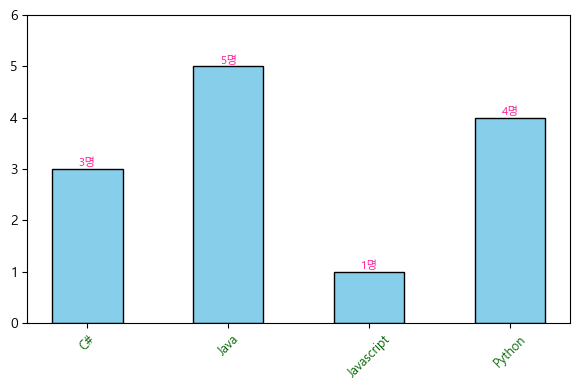

In [73]:
#5. SW특기별 인원수
df['SW특기'] = df['SW특기'].str.capitalize()
group = df.groupby('SW특기').size()
labels = group.index
values = group.values

plt.figure(figsize=(7, 4))
plt.bar(labels, values, color='skyblue', ec='black', width=0.5)
plt.ylim(0, 6)
plt.xticks(labels, rotation = 45, size=9, color='darkgreen')

for idx, val in enumerate(values):
    plt.text(idx, val+0.05, f'{val}명', ha='center', color='deeppink', size=8)

plt.show()

In [74]:
#학생별(이름) 평균점수
enroll = pd.read_csv('data/수강.csv')
group = enroll.groupby('학생번호')['점수'].mean().to_frame()

stu = pd.read_csv('data/학생.csv')

merge = stu.merge(group, how='left', on='학생번호')
merge.fillna({'점수':0}, inplace=True)

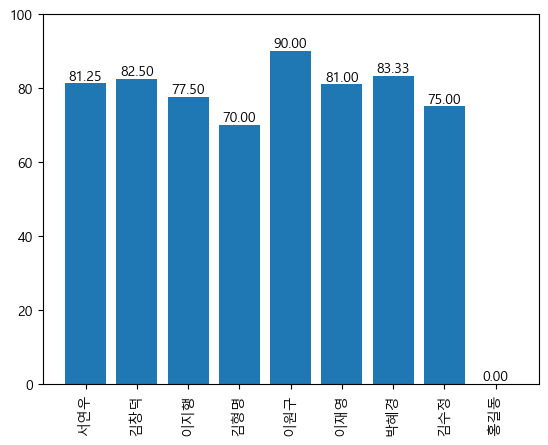

In [75]:
#학생별 평균점수
plt.bar(merge['학생이름'], merge['점수'])
plt.ylim(0, 100)
plt.xticks(merge['학생이름'], rotation=90)

for idx, grade in enumerate(merge['점수']):
    plt.text(idx, grade+1, f'{grade:.2f}', ha='center')



# xticks = [merge.loc[idx, x] for x in enumerate(merge)]
# plt.xticks(merge['학생이름'], [f"{x['학생이름']}{x['학생번호']}" for x in merge])

In [105]:
#강좌별(이름) 평균 - 막대
enroll = pd.read_csv('data/수강.csv')
group = enroll.groupby('강좌번호')['점수'].mean().to_frame()

course = pd.read_csv('data/강좌.csv')
merge = course.merge(group, how='left', on='강좌번호')

merge.fillna({'점수':0}, inplace=True)

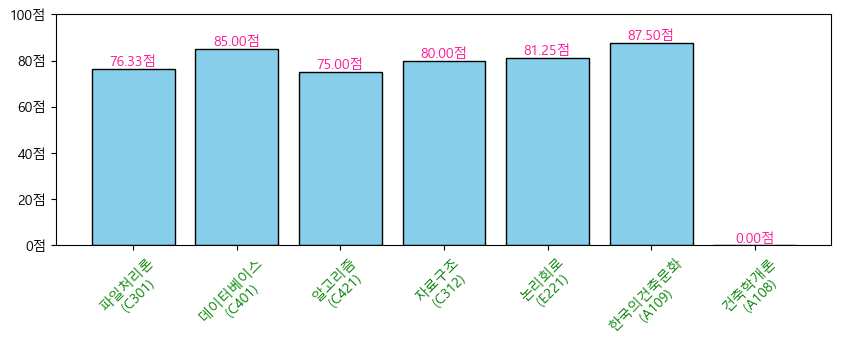

In [115]:
#강좌별(이름) 평균 - 막대
name = merge['강좌이름']
score = merge['점수']
num = merge['강좌번호']

plt.figure(figsize=(10, 3))
xticks = [f'{name[idx]}\n({num[idx]})' for idx in range(len(num))]

plt.bar(name, score, color='skyblue', ec='black')
plt.ylim(0, 100)
plt.xticks(name, xticks, rotation=45, color = 'green')

yticks = [y for y in range(0, 101, 20)]
plt.yticks(yticks, [f'{y}점' for y in yticks])

for idx, s in enumerate(score):
    plt.text(idx, s+1.5, f'{s:.2f}점', ha='center', color = 'deeppink')